In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

PR = '/content/gdrive/MyDrive/RoadSounds/Road Noises/'
PA = '/content/gdrive/MyDrive/RoadSounds/Ambulance data/'
PATH = '/content/gdrive/MyDrive/RoadSounds'
DIR = [PR, PA]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import soundfile as sf
import pandas as pd
import librosa
import numpy as np
import os
import tensorflow as tf
from scipy.io import wavfile
from scipy.signal import butter, lfilter
from IPython.display import Audio, display
import numpy as np
from PIL import Image
import wave
import wavefile
import librosa.display
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Read the first CSV file
df1 = pd.read_csv('/content/gdrive/MyDrive/RoadSounds/Ambulance_final.csv')

# Read the second CSV file
df2 = pd.read_csv('/content/gdrive/MyDrive/RoadSounds/Road_final.csv', header=None, names=df1.columns)

# Combine the two DataFrames
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
# List to store the lengths
lengths = []

# Iterate over the audio files
for dir in DIR:
  for filename in os.listdir(dir):
      # Check if the file is an audio file
      if filename.endswith('.wav') or filename.endswith('.mp3'):
          # Load the audio file and get its length
          filepath = os.path.join(dir, filename)
          audio_data, samplerate = librosa.load(filepath, mono=True, sr=20000)

          # Append the length to the list
          lengths.append(audio_data)

print("Number of Files", len(lengths))

Number of Files 1834


In [ ]:
y = 0
lengths = 0

In [ ]:
y=np.array(lengths)
type(y[0][0])

<ipython-input-208-ef382a9ea932>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y=np.array(lengths)


numpy.float32

In [ ]:
flattened_arr = np.concatenate(y)

print("Min: ", np.min(flattened_arr))
print("Mean: ", np.mean(flattened_arr))
print("Max: ", np.max(flattened_arr))

Min:  -1.3095069
Mean:  -7.4190297e-07
Max:  1.4784514


In [ ]:
def normalize_array(arr):
    mean = -7.4190297e-07
    max_abs = 1.4784514
    normalized_arr = arr - mean
    normalized_arr = normalized_arr / max_abs
    return normalized_arr

In [ ]:
X = []
for n in y:
  X.append(normalize_array(n))

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
x = data, samplerate = librosa.load(filepath, mono=True, sr=20000)
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
print(type(y))
sf.write('stereo_file1.wav', y, 20000,)

In [ ]:
path = 'ambulance10.wav'
lowcut = 500.0
highcut = 5000.0
FRAME_RATE = 20000.0

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass_filter(buffer):
    return butter_bandpass_filter(buffer, lowcut, highcut, FRAME_RATE, order=6)

data, samplerate = librosa.load(filepath, mono=True, sr=20000)
print(data.shape)
filtered = np.apply_along_axis(bandpass_filter, 0, data).astype('int16')
wavfile.write("filtered_"+path, 20000, filtered)


(38000,)


In [ ]:
display(Audio(path, autoplay=False))
display(Audio("filtered_"+path, autoplay=False))

In [ ]:
X = np.array(X)
flattened_arr = np.concatenate(X)

<ipython-input-213-3530d1cb44c3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [ ]:
print("Min: ", np.min(flattened_arr))
print("Mean: ", np.mean(flattened_arr))
print("Max: ", np.max(flattened_arr))

Min:  -0.8857283
Mean:  9.807803e-12
Max:  1.0000005


In [ ]:
type(y)

numpy.ndarray

In [ ]:
# Directory containing the audio files
directory1 = PA
directory2 = PR

# List to store the lengths
lengths = []

# Iterate over the audio files
for filename in os.listdir(directory1):
    # Check if the file is an audio file
    if filename.endswith('.wav') or filename.endswith('.mp3'):
        # Load the audio file and get its length
        filepath = os.path.join(directory1, filename)
        audio_data, samplerate = sf.read(filepath)
        duration = len(audio_data) / samplerate  # Length in seconds

        # Append the length to the list
        lengths.append(duration)
for filename in os.listdir(directory2):
    # Check if the file is an audio file
    if filename.endswith('.wav') or filename.endswith('.mp3'):
        # Load the audio file and get its length
        filepath = os.path.join(directory2, filename)
        audio_data, samplerate = sf.read(filepath)
        duration = len(audio_data) / samplerate  # Length in seconds

        # Append the length to the list
        lengths.append(duration)
# Calculate the mean length
mean_length = np.mean(lengths)
print("Number of Files", len(lengths))
print("Mean Length:", mean_length, "seconds")


Number of Files 1834
Mean Length: 7.867958713838134 seconds


In [ ]:
median_length = np.median(lengths)
print("Median Length:", median_length, "seconds")

Median Length: 8.73452380952381 seconds


In [ ]:
first_quartile = np.percentile(lengths, 25)
third_quartile = np.percentile(lengths, 75)

print("1st Quartile:", first_quartile, "seconds")
print("3rd Quartile:", third_quartile, "seconds")

1st Quartile: 3.890034013605442 seconds
3rd Quartile: 10.167698412698414 seconds


In [ ]:
fq = 3.890034013605442
tq = 10.167698412698414

In [ ]:
np.std(lengths)

3.496399355361782

In [ ]:
iqr = third_quartile - first_quartile

# Define the lower and upper bounds for outliers
lower_bound = fq - 1.5 * iqr
upper_bound = tq + 1.5 * iqr

# Identify outliers
outliers = [b for b in lengths if b < fq or b > tq]

print(iqr, " ", lower_bound, " ", upper_bound)
print("Outliers:", outliers)
print("Number of outliers", len(outliers))

6.277664399092972   -5.526462585034016   19.584195011337872
Outliers: [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.008, 3.008, 3.008, 3.008, 3.008, 3.0, 3.008, 3.008, 3.008, 3.0, 3.008, 3.0, 3.008, 3.0, 3.0, 3.008, 3.008, 3.0, 3.0, 3.0, 3.008, 3.0, 3.0, 3.0, 3.0, 3.008, 3.008, 3.0, 3.0, 3.0, 3.008, 3.0, 3.008, 3.0, 3.0, 3.008, 3.008, 3.0, 3.0, 3.008, 3.008, 3.008, 3.01859410430839, 3.008, 3.008, 3.0, 3.0, 3.0, 3.0, 3.008, 3.008, 3.008, 3.0, 3.008, 3.01859410430839, 3.0, 3.0, 3.0, 3.008, 3.008, 3.0, 3.01859410430839, 3.0, 3.0, 3.008, 3.008, 3.0, 3.01859410430839, 3.008, 3.0, 3.0, 3.0, 3.0, 3.008, 3.01859410430839, 3.0, 3.008, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,

In [ ]:
threshold = 1.5
outlier = []
for i in lengths:
    z = abs((i-mean_length))/3.496399355361782
    if z > threshold:
        outlier.append(i)
        print(i)
print('Number of outliers: ', len(outlier))

In [ ]:
ub = 15
lb = 5
outlier = []
for i in lengths:
    if lb > i or ub < i:
        outlier.append(i)
        print(i)
print('Number of outliers: ', len(outlier))

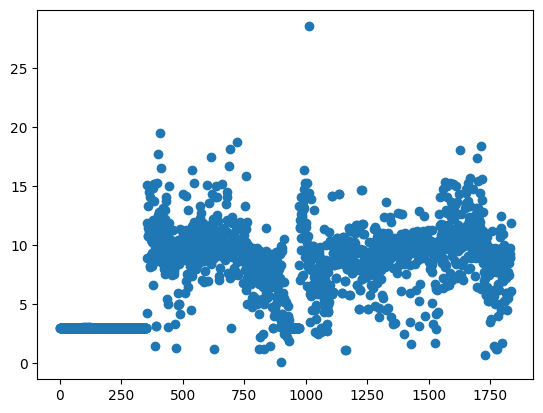

In [ ]:
plt.scatter(range(0,len(lengths)), lengths, )

In [ ]:
plt.scatter(range(len(lengths)), lengths)
plt.xlabel("Audio File Index")
plt.ylabel("Length (seconds)")
plt.title("Length of Audio Files")
plt.show()

In [ ]:
directories = [PA,PR]
# List to store the modified lengths
modified_lengths = []
ub = 15
lb = 5
mean_length = 7.867958713838134

# Iterate over the audio files again
for directory in directories:
  for filename in os.listdir(directory):
      filen = Path(PATH + '/NewFiles2/' + filename.replace('wav','png'))
      if filename.endswith('.wav') and filen.is_file() is not True:
          data, sr = librosa.load(directory + filename, mono=True)
          duration = len(data) / sr
          # Check if the length is within the bounds
          if lb <= duration <= ub:


              # Pad or cut the audio file to the mean length


              target_length = int(mean_length * sr)
              print("Target Length: ", target_length)
              if  target_length < len(data):
                fixed = librosa.util.fix_length(data = data, size=target_length)
              if target_length > len(data):
                deficit = target_length - len(data)
                if deficit % 2 == 0:
                  l = int(deficit/2)
                  r = int(deficit/2)
                else:
                  l = int(deficit//2)
                  r = int(deficit//2 + 1)
                print(l," ", r)
                fixed = np.pad(data, (l, r),'wrap')

              spectrogram = librosa.stft(fixed)

              # Convert the spectrogram to decibel scale
              spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

              # Display the spectrogram without axes
              plt.figure(figsize=(10, 6))
              plt.axis('off')
              librosa.display.specshow(spectrogram_db, sr=sr, x_axis='off', y_axis='off')

              # Save the spectrogram as an image file
              output_path = PATH + '/NewFiles2/' + filename.replace('wav', 'png')
              plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

              # Close the plot
              plt.close()


          else:
              # Drop the outlier audio file
              print(f"Dropped outlier: {filename}")

# Print the modified lengths
print("Modified Lengths:", len(modified_lengths))


In [ ]:
_, _, files = next(os.walk(PATH + "/NewFiles2/Road/"))
file_count = len(files)
print(file_count)

789


In [ ]:
# Directory containing the audio files
directories = [PA,PR]

# List to store the lengths
lengths = []

# Calculate the mean length
mean_length = 8.984117245124212

first_quartile = 7.732244897959184
third_quartile = 10.41647619047619

print("1st Quartile:", first_quartile, "seconds")
print("3rd Quartile:", third_quartile, "seconds")
iqr = third_quartile - first_quartile

# Define the lower and upper bounds for outliers
lower_bound = first_quartile - 1.5 * iqr
upper_bound = third_quartile + 1.5 * iqr

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

1st Quartile: 7.732244897959184 seconds
3rd Quartile: 10.41647619047619 seconds
Lower Bound:  3.705897959183674
Upper Bound:  14.4428231292517


In [ ]:
def to_spec(filename):
  # Load the audio file
  if "road" in filename:
    path = PR + filename
  else:
    path = PA + filename
  y, sr = librosa.load(path)

  # Compute the spectrogram
  spectrogram = librosa.stft(y)

  # Convert the spectrogram to decibel scale
  spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

  # Display the spectrogram without axes
  plt.figure(figsize=(10, 6))
  plt.axis('off')
  librosa.display.specshow(spectrogram_db, sr=sr, x_axis='off', y_axis='off')

  # Save the spectrogram as an image file
  output_path = PATH + '/Spectograms/' + filename.replace('wav', 'png')
  plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

  # Close the plot
  plt.close()

In [ ]:
def to_spec_wav(path):
  y, sr = librosa.load(path)

  # Compute the spectrogram
  spectrogram = librosa.stft(y)
  # Convert the spectrogram to decibel scale
  spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

  # Display the spectrogram without axes
  plt.figure(figsize=(10, 6))
  plt.axis('off')
  librosa.display.specshow(spectrogram_db, sr=sr, x_axis='off', y_axis='off')

  # Save the spectrogram as an image file
  plt.savefig(path.replace('wav','png'), bbox_inches='tight', pad_inches=0)
  plt.show()
  # Close the plot
  plt.close()

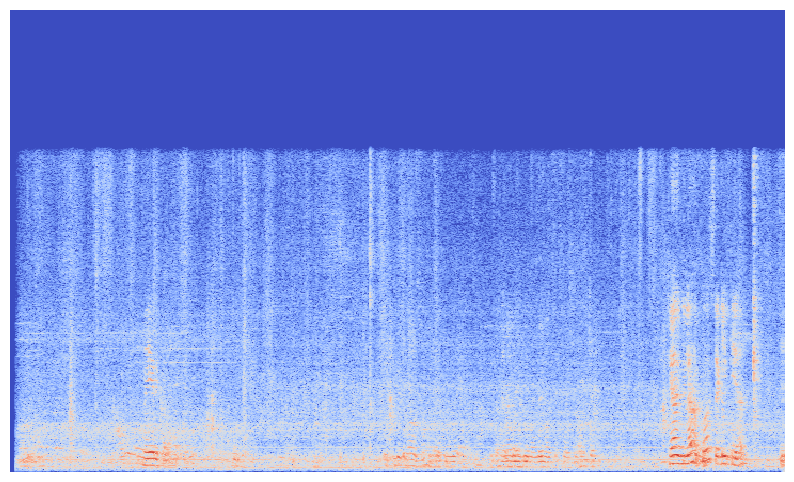

In [ ]:
to_spec_wav("siren.wav")

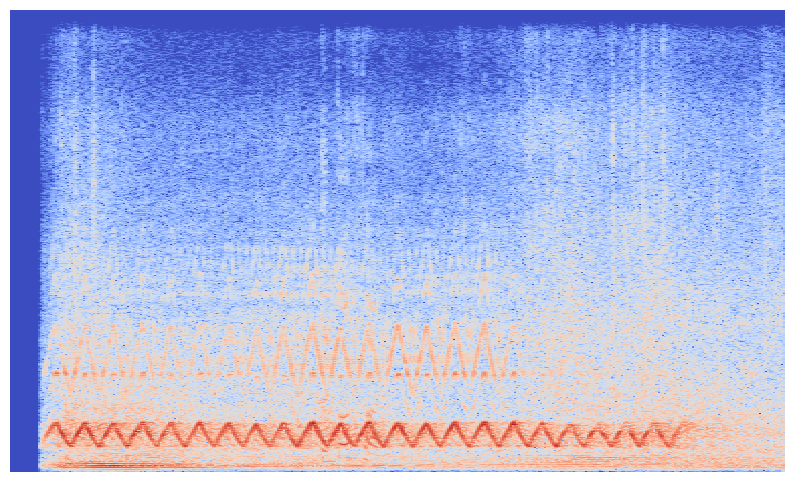

In [ ]:
to_spec_wav(PA + "ambulance10.wav")

In [ ]:
def to_mel_wav(path):
  y, sr = librosa.load(path)

  # Compute the spectrogram
  mel = librosa.feature.melspectrogram(y=y, sr=sr, fmax=5000, n_mels=1000)
  # Convert the spectrogram to decibel scale
  spectrogram_db = librosa.amplitude_to_db(abs(mel))

  # Display the spectrogram without axes
  plt.figure(figsize=(10, 6))
  plt.axis('off')
  librosa.display.specshow(spectrogram_db, sr=sr, x_axis='off', y_axis='off')
  plt.savefig("mel.png", bbox_inches='tight', pad_inches=0)

  # Save the spectrogram as an image file
  plt.savefig(path.replace('wav','png'), bbox_inches='tight', pad_inches=0)
  plt.show()
  # Close the plot

  plt.close()

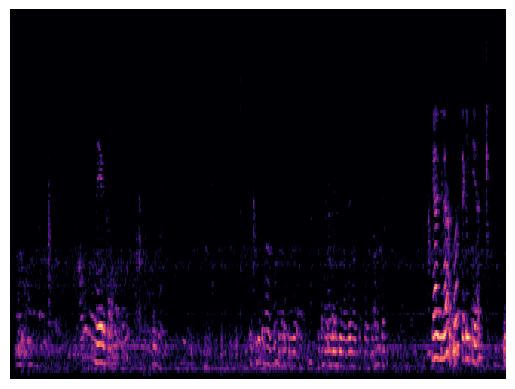

In [ ]:
to_mel_wav('siren.wav')

In [ ]:
for dir in DIR:
  for filename in os.listdir(dir):
    to_mel_wav(os.path.join(dir, filename))

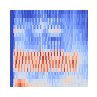

In [ ]:
to_mel_wav(PA + "ambulance10.wav")

In [ ]:
for n in df['filename']:
  filen = Path(PATH + '/Spectograms/' + n.replace('wav','png'))
  print(n)
  if filen.is_file() is not True:
    to_spec(n)

In [ ]:
to_spec_wav('birds.wav')

In [ ]:
for n in df['filename']:
  filen = Path(PATH + '/Spectograms/' + n.replace('wav','png'))
  print(n)
  if filen.is_file() is not True:
    to_spec(n)

In [ ]:
# Declare constants
IMAGE_HEIGHT = int(775/5)
IMAGE_WIDTH = int(462/5)
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 2

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(PATH+"/NewFiles"),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(PATH+"/NewFiles"),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 1336 files belonging to 2 classes.
Using 1069 files for training.
Found 1336 files belonging to 2 classes.
Using 267 files for validation.


In [ ]:
import os
import shutil
for filename in os.listdir(PATH + "/NewFiles2/"):
  if "road" in filename:
    os.rename(PATH + "/NewFiles2/" + filename, PATH + "/NewFiles2/Road/" + filename)

In [ ]:
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])

    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(16, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
34/34 [==============================] - 22s 550ms/step - loss: 0.6190 - accuracy: 0.6342 - val_loss: 0.5173 - val_accuracy: 0.7790
Epoch 2/10
34/34 [==============================] - 20s 483ms/step - loss: 0.5399 - accuracy: 0.7446 - val_loss: 0.5085 - val_accuracy: 0.7903
Epoch 3/10
34/34 [==============================] - 21s 548ms/step - loss: 0.4849 - accuracy: 0.7717 - val_loss: 0.4844 - val_accuracy: 0.8165
Epoch 4/10
34/34 [==============================] - 22s 527ms/step - loss: 0.4453 - accuracy: 0.8120 - val_loss: 0.4123 - val_accuracy: 0.7828
Epoch 5/10
34/34 [==============================] - 21s 552ms/step - loss: 0.4137 - accuracy: 0.8475 - val_loss: 0.3271 - val_accuracy: 0.8315
Epoch 6/10
34/34 [==============================] - 21s 550ms/step - loss: 0.3180 - accuracy: 0.8793 - val_loss: 0.3913 - val_accuracy: 0.7940
Epoch 7/10
34/34 [==============================] - 21s 550ms/step - loss: 0.2559 - accuracy: 0.9121 - val_loss: 0.3601 - val_accuracy: 0.8127

In [ ]:
model.save('model')

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_18',
 'max_pooling2d_18',
 'conv2d_19',
 'max_pooling2d_19',
 'conv2d_20',
 'max_pooling2d_20',
 'flatten_6',
 'dense_13',
 'dropout_7',
 'dense_14']

In [ ]:
model.layers

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 78, 46, 16) dtype=float32 (created by layer 'conv2d_18')>,
 <KerasTensor: shape=(None, 39, 23, 16) dtype=float32 (created by layer 'max_pooling2d_18')>,
 <KerasTensor: shape=(None, 39, 23, 32) dtype=float32 (created by layer 'conv2d_19')>,
 <KerasTensor: shape=(None, 19, 11, 32) dtype=float32 (created by layer 'max_pooling2d_19')>,
 <KerasTensor: shape=(None, 19, 11, 64) dtype=float32 (created by layer 'conv2d_20')>,
 <KerasTensor: shape=(None, 9, 5, 64) dtype=float32 (created by layer 'max_pooling2d_20')>,
 <KerasTensor: shape=(None, 2880) dtype=float32 (created by layer 'flatten_6')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_13')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dropout_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_14')>]

In [ ]:
feature_map_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)

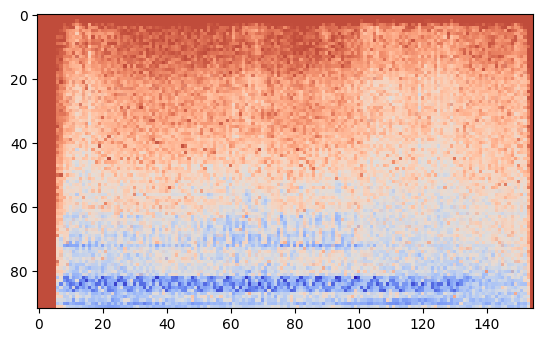

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMAGE_HEIGHT = int(775/5)
IMAGE_WIDTH = int(462/5)
image_path = PATH + "/NewFiles/Ambulance/ambulance10.png"
img=cv2.imread(image_path)

x= cv2.resize(img, (IMAGE_HEIGHT,IMAGE_WIDTH))
plt.imshow(x)

In [ ]:
x.shape

(92, 155, 3)

16


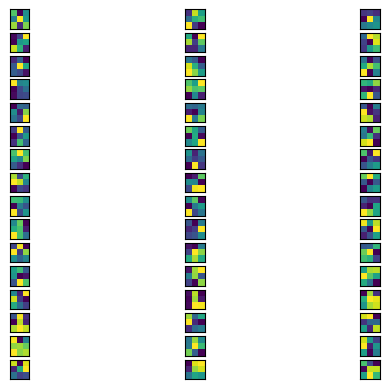

32


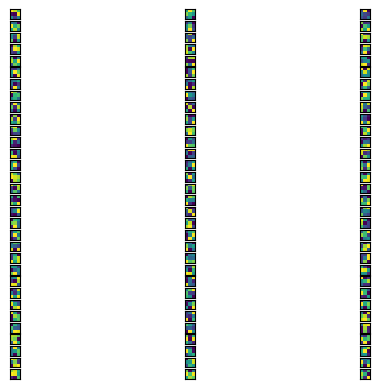

64


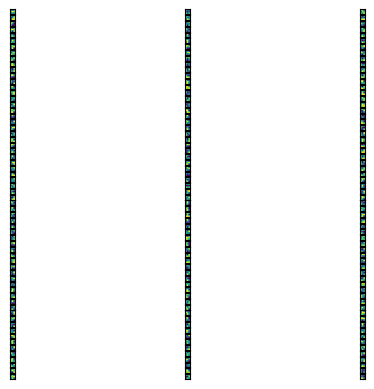

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        #print(layer.name, filters.shape)

        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape[3])
        filter_cnt=1

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

(1, 155, 92, 3)
1/1 [==============================] - 0s 479ms/step
(1, 39, 23, 16)
ran
39
(1, 39, 23, 32)
ran
39
(1, 19, 11, 32)
ran
19


<ipython-input-78-438fd5895370>:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(1, 19, 11, 64)
ran
19
(1, 9, 5, 64)
ran
9
(1, 2880)
(1, 64)
(1, 64)
(1, 1)


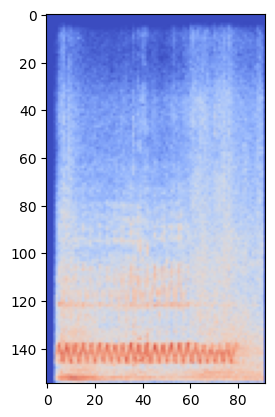

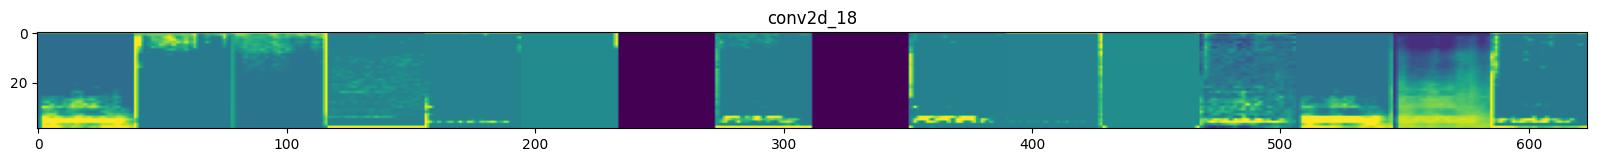

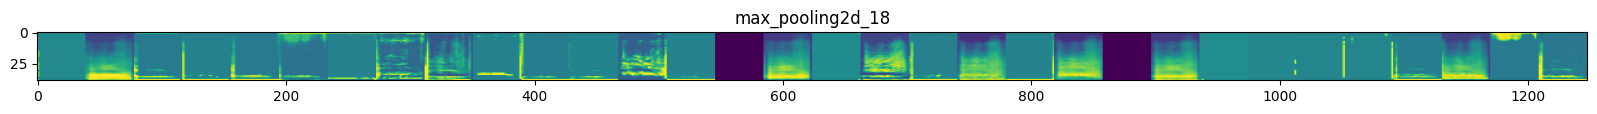

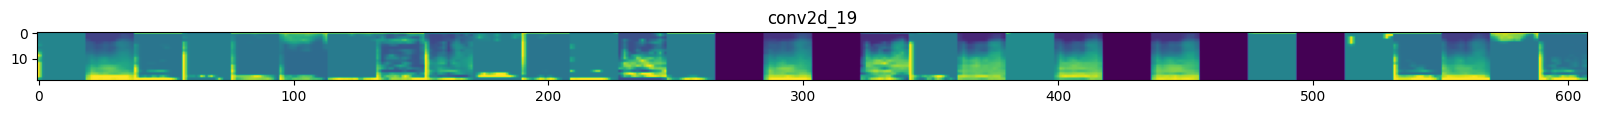

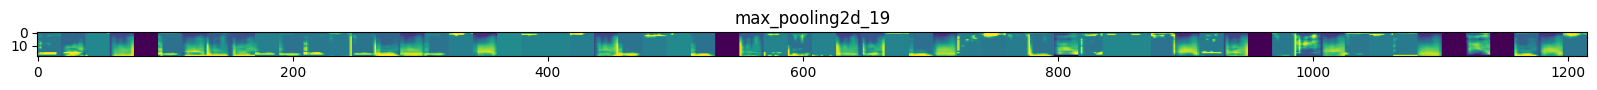

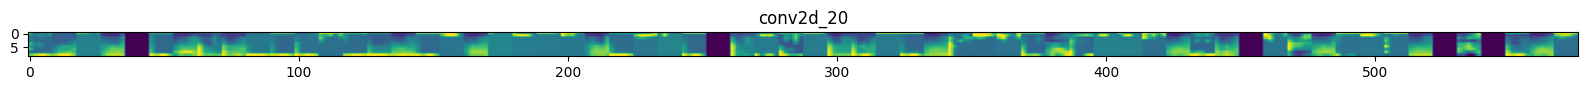

In [ ]:
# Load and resize the image
image = Image.open(PATH + "/NewFiles/Ambulance/ambulance10.png")  # Replace with the path to your image
image = image.resize((92, 155))  # Resize to match the expected input shape

if image.mode == 'RGBA':
    image = image.convert('RGB')

plt.imshow(image)
image_array = np.array(image)

# Add a batch dimension to the image
input_image = np.expand_dims(image_array, axis=0)
x = input_image/255.0

print(x.shape)

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    print("ran")

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid_size = (size, size * n_features)
    print(display_grid_size[0])

    display_grid = np.zeros(display_grid_size)

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      x_resized = cv2.resize(x, (display_grid_size[0], display_grid_size[0]))

      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x_resized

# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )


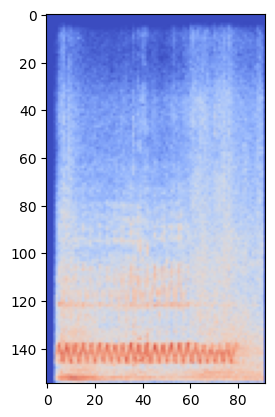

In [ ]:
# Load and resize the image
image = Image.open(PATH + "/NewFiles/Ambulance/ambulance10.png")  # Replace with the path to your image
image = image.resize((92, 155))  # Resize to match the expected input shape

if image.mode == 'RGBA':
    image = image.convert('RGB')

plt.imshow(image)
image_array = np.array(image)

# Add a batch dimension to the image
input_image = np.expand_dims(image_array, axis=0)

In [ ]:
feature_maps = feature_map_model.predict(input_image)


1/1 [==============================] - 0s 224ms/step


In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")


The shape of the conv2d_18 is =======>> (1, 78, 46, 16)
The shape of the max_pooling2d_18 is =======>> (1, 39, 23, 16)
The shape of the conv2d_19 is =======>> (1, 39, 23, 32)
The shape of the max_pooling2d_19 is =======>> (1, 19, 11, 32)
The shape of the conv2d_20 is =======>> (1, 19, 11, 64)
The shape of the max_pooling2d_20 is =======>> (1, 9, 5, 64)
The shape of the flatten_6 is =======>> (1, 2880)
The shape of the dense_13 is =======>> (1, 64)
The shape of the dropout_7 is =======>> (1, 64)
The shape of the dense_14 is =======>> (1, 1)


In [ ]:
image_belt = []
for layer_name, feature_map in zip(layer_names, feature_maps):
  if len(feature_map.shape) == 4:
      k = feature_map.shape[-1]
      size=feature_map.shape[1]
      for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image= np.clip(x, 0, 255).astype('uint8')
        image_belt[:, i * size : (i + 1) * size] = feature_image


TypeError: ignored

In [ ]:
# Set the path to the folder containing spectrogram images
image_folder = PATH + "/NewFiles/"

# Load the spectrogram images and corresponding labels
X = []
y = []

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):  # Adjust the file extension if needed
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        spectrogram = np.array(image)  # Convert image to numpy array
        if 'road' in filename:
          label = 'road'
        else:
          label = 'ambulance'
        X.append(spectrogram)
        y.append(label)
        del image
        del image_path

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90210)
del X, y

# Normalize the input data to a range between 0 and 1


# Define the CNN model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


In [ ]:
X_train.shape

(1068, 462, 775, 4)

In [ ]:
# Set the path to the folder containing spectrogram images
image_folder = PATH + "/Spectograms/"

# Load the spectrogram images and corresponding labels
X = []
y = []

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):  # Adjust the file extension if needed
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        spectrogram = np.array(image)  # Convert image to numpy array
        label = filename.replace('.png','')  # Extract label from the filename
        X.append(spectrogram)
        y.append(label)

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)
# Load the large array from disk as a memory-mapped file
filename = PATH + '/train_array.npy'
np.save(PATH + '/train_array.npy', X)
del X
memory_mapped_array = np.memmap(filename, dtype='float32', mode='r+')

# Define the divisor
divisor = 255

# Divide the memory-mapped array element-wise
result_array = memory_mapped_array / divisor

# Save the result array back to disk
np.save(PATH + "/train_normal.npy", result_array)


KeyboardInterrupt: ignored

In [ ]:
print(np.isfinite(result_array).all())
print(np.isfinite(memory_mapped_array).all())


False
False
